In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from wmpgnn.configs.config_loader import ConfigLoader
#from wmpgnn.model.model_loader import ModelLoader


In [9]:
# Define the config files to compare
configs_to_compare = {
    "mlp_hom": "mp_gnn_run3.yaml",
    "mlp_het": "heteromp_gnn_run3.yaml",
}

# Load the config files
config_loader,datasets = {},{}
models = {}
for label, yml in configs_to_compare.items():
    config_loader[label] = ConfigLoader(f"config_files/{yml}", environment_prefix="DL")
    datasets[label] = pd.read_csv(config_loader[label].get("training.model_file").replace(".pt",".csv"))
    #models[label] = ModelLoader(config_loader).get_model()

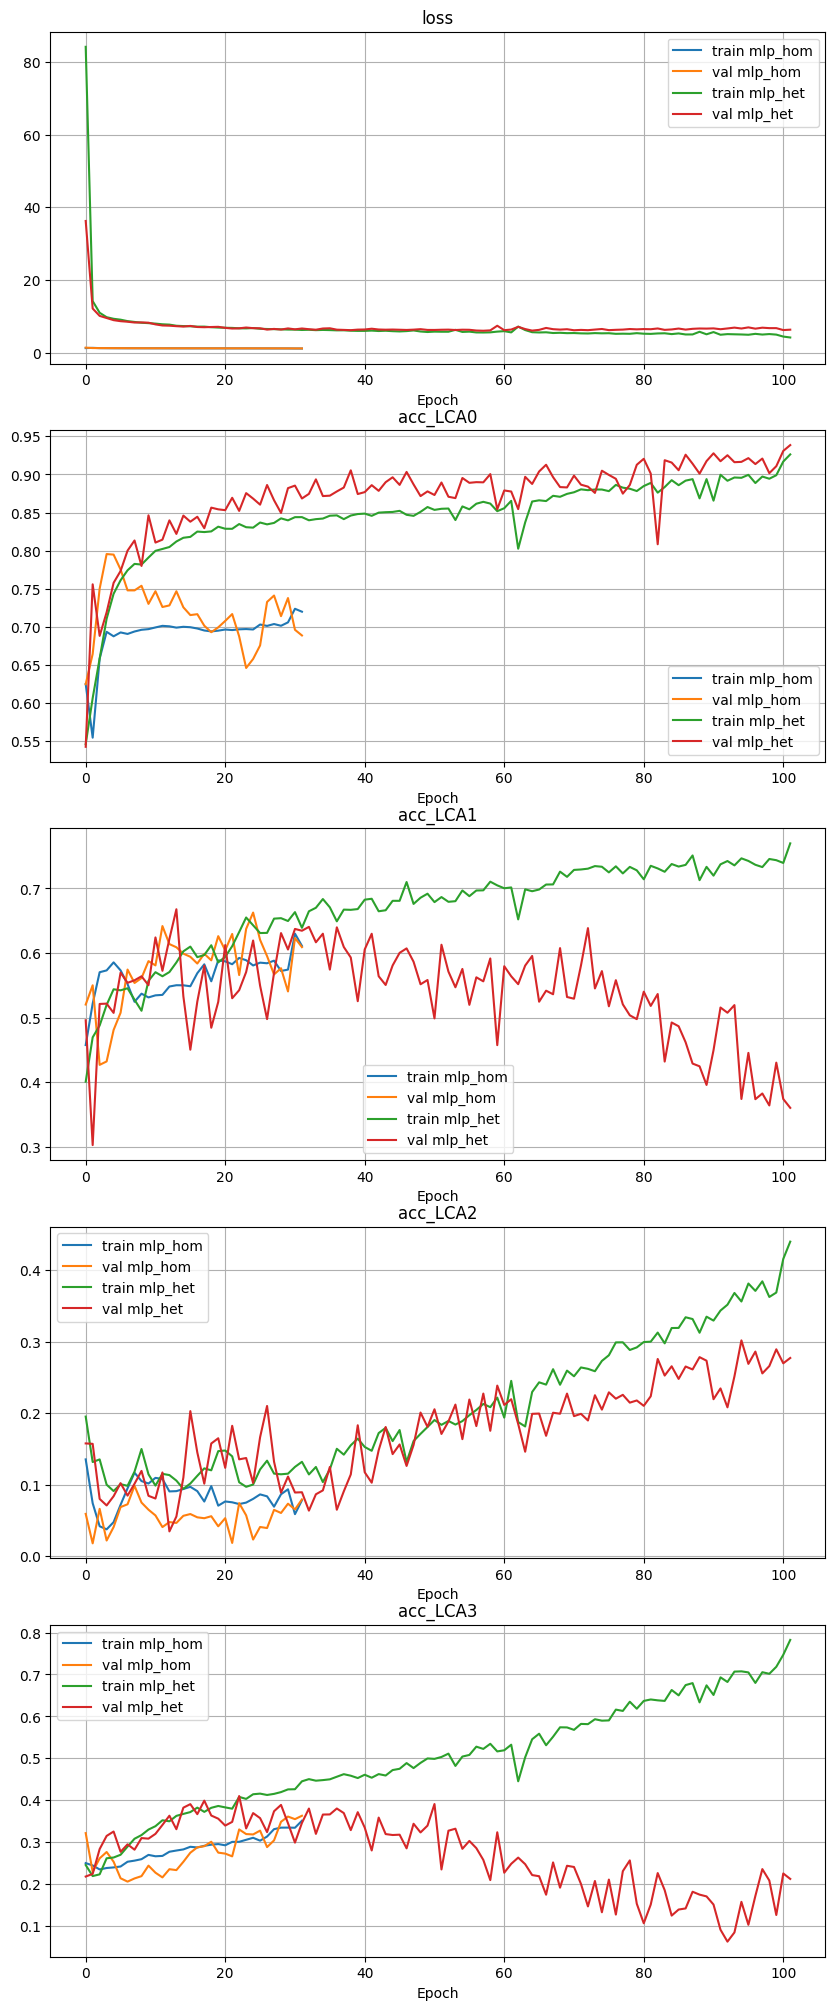

In [14]:
features = ['loss', 'acc_LCA0', 'acc_LCA1', 'acc_LCA2', 'acc_LCA3']

Nfeatures = len(features)
fig, axs = plt.subplots(Nfeatures, 1, figsize=(10, 5*Nfeatures))
for i, feature in enumerate(features):
    for label in configs_to_compare.keys():
        axs[i].plot(datasets[label][f"train_{feature}"], label=f"train {label}")
        axs[i].plot(datasets[label][f"val_{feature}"], label=f"val {label}")
    axs[i].set_xlabel('Epoch')
    axs[i].grid()
    axs[i].set_title(feature)
    axs[i].legend()

In [15]:
datasets["mlp_het"].columns

Index(['Unnamed: 0', 'train_loss', 'val_loss', 'train_acc_LCA0',
       'val_acc_LCA0', 'train_acc_LCA1', 'val_acc_LCA1', 'train_acc_LCA2',
       'val_acc_LCA2', 'train_acc_LCA3', 'val_acc_LCA3', 'ce_train_loss',
       'ce_val_loss', 'bce_nodes_train_loss', 'bce_nodes_val_loss',
       'bce_edges_train_loss', 'bce_edges_val_loss', 'pv_train_acc',
       'pv_val_acc', 'pv_train_loss', 'pv_val_loss'],
      dtype='object')

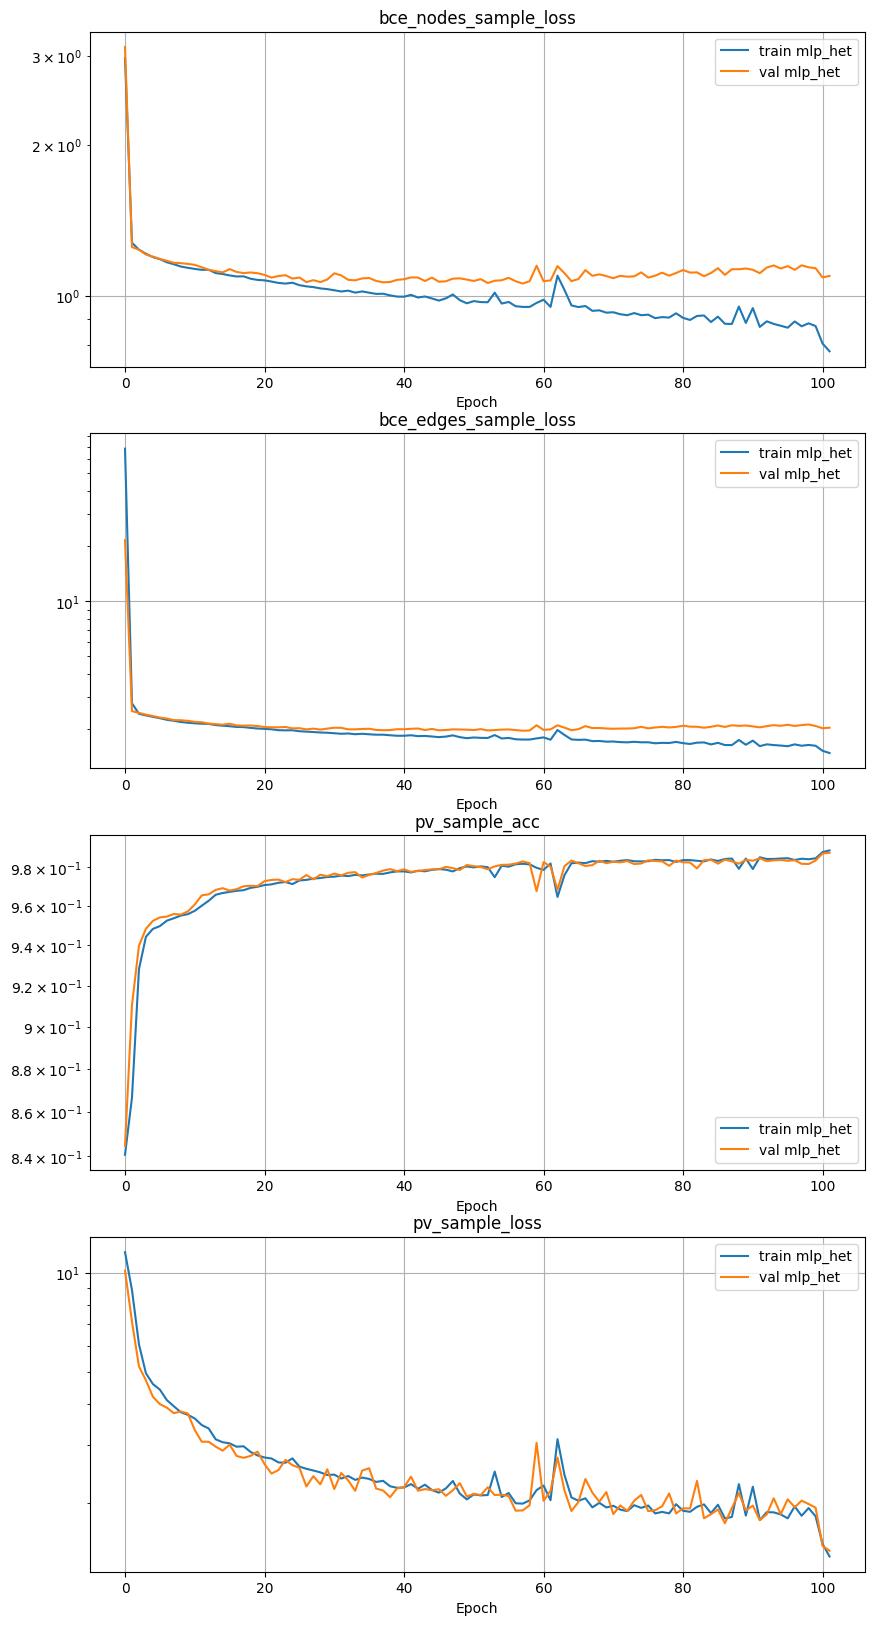

In [21]:
features = ['bce_nodes_sample_loss',
       'bce_edges_sample_loss', 'pv_sample_acc', 'pv_sample_loss']

Nfeatures = len(features)
fig, axs = plt.subplots(Nfeatures, 1, figsize=(10, 5*Nfeatures))
for i, feature in enumerate(features):
    for sample in ['train','val']:
        axs[i].plot(datasets["mlp_het"][feature.replace("sample",sample)], label=f"{sample} mlp_het")
    axs[i].set_xlabel('Epoch')
    axs[i].grid()
    axs[i].set_yscale('log')
    axs[i].set_title(feature)
    axs[i].legend()